In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import shelve
import pandas as pd
import h5py
import glob
import astropy
from astropy.table import Table as Table

In [13]:
#stacking probs
fnames1 = glob.glob('/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/*post1*')
fnames2 = glob.glob('/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/*post2*')
fnames3 = glob.glob('/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/*post3*')

In [14]:
fnames = [fnames1, fnames2, fnames3]

In [15]:
zs = np.arange(.005, 3.506, 0.01)

In [16]:
posteriors1 = posteriors2 = posteriors3 = []

posteriors = [posteriors1, posteriors2, posteriors3]

In [17]:
for i in range(3):
    for fname in fnames[i]:
        post = np.loadtxt(fname)
        if np.any(np.isnan(post)): print('bad')
        posteriors[i].append(post)
        if np.any(np.isnan(posteriors[i])): print(fname, 'bad2')
        #posteriors[i] = np.sum((posteriors[i], np.loadtxt(fname)))

posteriors_ = np.sum(posteriors, axis=1)
posteriors_ /= np.max(posteriors_)

In [18]:
#fnames = glob.glob('/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/*cat*')

# cats = []
# for fname in fnames:
#     cats.append(Table.read(fname))
    
# cat200 = astropy.table.vstack(cats)

# cat200.write('/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/BPZcat200.fits')

In [19]:
cat200 = Table.read('/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/BPZcat200.fits')

In [20]:
mask1 = cat200[f'Z_SAMP1']>-100
mask2 = cat200[f'Z_SAMP2']>-100
mask3 = cat200[f'Z_SAMP3']>-100

In [21]:
masks = [mask1, mask2, mask3]

In [22]:
bins = [0.2, 0.43, 0.63, 0.9, 1.3]

binmasks = []
for j in range(1, 4):
    binmask_list = []
    for i in range(4):
        greater = bins[i]<cat200[f'Z_SAMP{j}']
        less = bins[i+1]>cat200[f'Z_SAMP{j}']
        binmask_list.append(np.logical_and(greater, less))
    binmasks.append(binmask_list)

binmasks_B = []
for j in range(1, 4):
    binmask_list = []
    for i in range(4):
        greater = bins[i]<cat200[f'Z_B{j}']
        less = bins[i+1]>cat200[f'Z_B{j}']
        binmask_list.append(np.logical_and(greater, less))
    binmasks_B.append(binmask_list)

binmasks_P = []
for j in range(1, 4):
    binmask_list = []
    for i in range(4):
        greater = bins[i]<zs
        less = bins[i+1]>zs
        binmask_list.append(np.logical_and(greater, less))
    binmasks_P.append(binmask_list)

maskzb2s = []
for i in range(1,4):    
    maskzb2s.append(cat200[f'Z_B{i}']<3.5)

maskzs2s = []
for i in range(1,4):    
    maskzs2s.append(cat200[f'Z_SAMP{i}']<3.5)

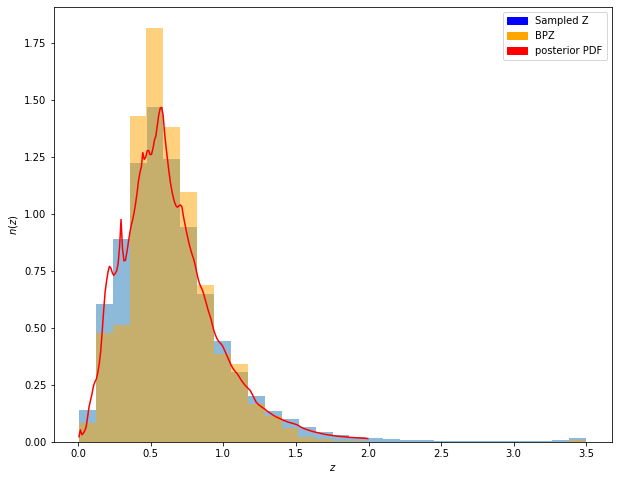

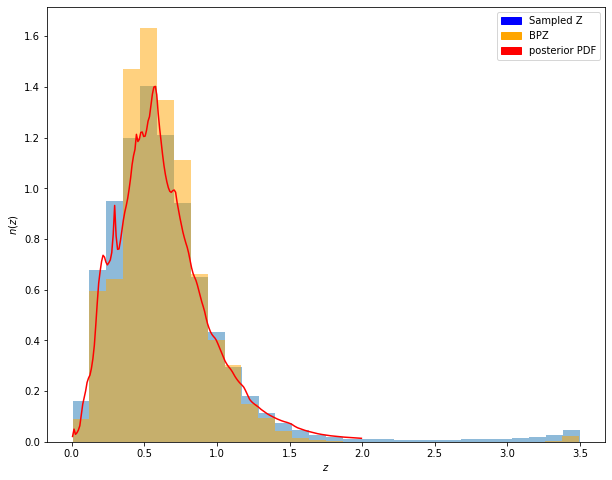

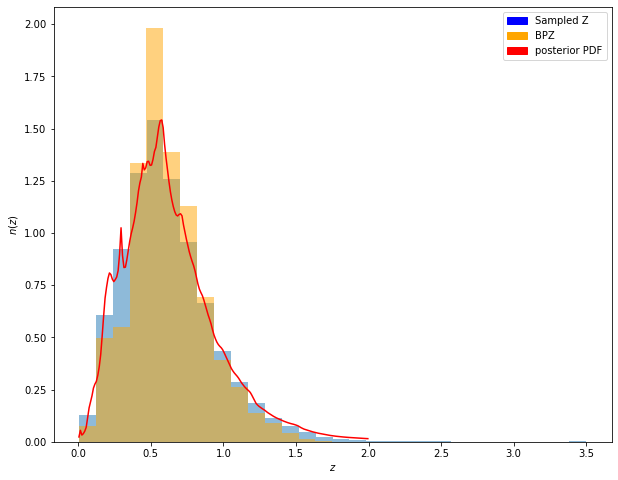

In [23]:
import matplotlib

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)


figs=[]
for i in range(1, 4): 
    fig, ax = plt.subplots()
    hist1 = ax.hist(cat200[f'Z_SAMP{i}'][np.logical_and(masks[i-1], maskzs2s[i-1])], bins=30, alpha = .5, density=True)
    hist2 = ax.hist(cat200[f'Z_B{i}'][np.logical_and(masks[i-1], maskzb2s[i-1])], bins=30, alpha = .5, color='orange', density=True)
    plot1 = ax.plot(zs[zs<=2.], hist1[0].max()*posteriors_[i-1][zs<=2.], color='red')
    blue_patch = mpatches.Patch(color='b', label='Sampled Z')
    orange_patch = mpatches.Patch(color='orange', label='BPZ')
    red_patch = mpatches.Patch(color='red', label='posterior PDF')
    ax.set_xlabel(xlabel=r'$z$')
    ax.set_ylabel(ylabel=r'$n(z)$')
    fig.set_size_inches(10, 8)
    ax.legend(handles=[blue_patch, orange_patch, red_patch])
    fig.show()
    figs.append(fig)

for i, fig in enumerate(figs):
    fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/N(z)_02_{i+1}.pdf')
    fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/N(z)_02_{i+1}.png')

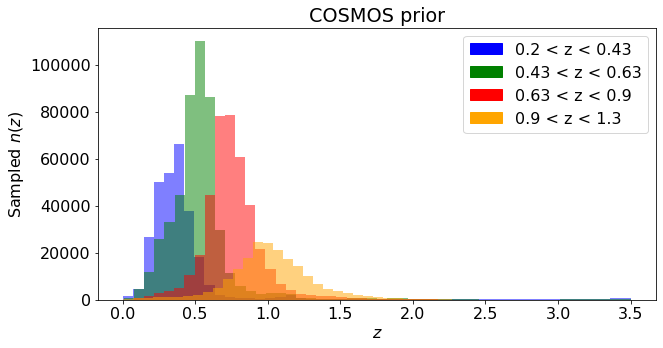

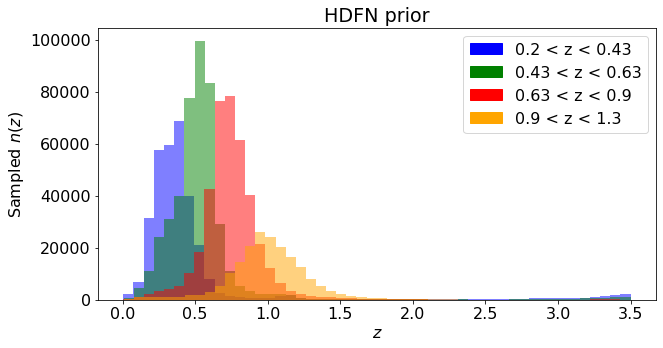

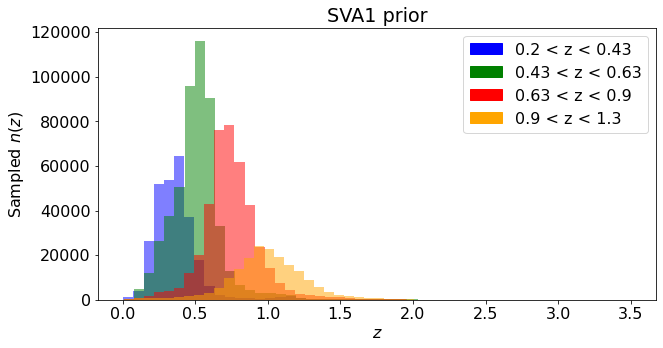

In [24]:
import matplotlib

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

figs = []
colors_samp = ['blue', 'green', 'red', 'orange']
colors_bpz  = ['goldenrod', 'purple', 'cyan', 'brown']
means_bpz = np.empty(shape=(3, 4))
variance_bpz = np.empty(shape=(3, 4))
# for i in range(1, 4):
#     fig, ax = plt.subplots()
#     for j, (binmask, binmask_B) in enumerate(zip(binmasks[i-1], binmasks_B[i-1])):
#         if i == 1: ax.set_title(label='BPZ N(z) with COSMOS prior')
#         elif i == 2: ax.set_title(label='BPZ N(z) with HDFN prior')
#         elif i == 3: ax.set_title(label='BPZ N(z) with SVA1 prior')
#         ax.set_xlabel(xlabel=r'$z$')
#         ax.set_ylabel(ylabel=r'$n(z)$')
#         #hist1 = ax.hist(cat200[f'Z_SAMP{i}'][binmask_B], bins=50, alpha = .2, label='Sampled Z', color=colors_samp[j], density=True)
#         hist2 = ax.hist(cat200[f'Z_B{i}'][np.logical_and(binmask, maskzb2s[i-1])], bins=30, alpha = .5, color=colors_bpz[j], label='BPZ')#, density=True)
#         #plot1 = ax.plot(zs[binmask_P], hist1[0].max()*posteriors[i-1][binmask_P]/np.max(posteriors[i-1][binmask_P]), color = 'red')
#         #blue_patch = mpatches.Patch(color=colors_samp[j], label='Sampled Z')
#         orange_patch = mpatches.Patch(color=colors_bpz[j], label='BPZ')
#         #red_patch = mpatches.Patch(color='red', label='posterior PDF')
        
#         means_bpz[i-1,j] = np.mean(cat200[f'Z_B{i}'][np.logical_and(binmask_B, maskzs2s[i-1])])
#         variance_bpz[i-1,j] = np.var(cat200[f'Z_B{i}'][np.logical_and(binmask_B, maskzs2s[i-1])])
        
#         #print('mean: ', means_bpz[i-1,j])
#         #print('variance: ', variance_bpz[i-1,j])
#     #ax.legend(handles=[orange_patch])#, red_patch])
#     fig.set_size_inches(10, 5)
#     figs.append(fig)
#     fig.show()
# for i, fig in enumerate(figs):
#         if i==0: 
#             fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/BPZ_N(z)_Liagle.pdf')
#             fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/BPZ_N(z)_Liagle.png')
#         elif i==1:
#             fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/BPZ_N(z)_HDFN.pdf')
#             fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/BPZ_N(z)_HDFN.png')
#         elif i==2:
#             fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/BPZ_N(z)_SVA1.pdf')
#             fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/BPZ_N(z)_SVA1.png')

figs =[]
median_samp = np.empty(shape=(3, 4))
means_samp = np.empty(shape=(3, 4))
variance_samp = np.empty(shape=(3, 4))
for i in range(1, 4):
    fig, ax = plt.subplots()
    patches=[]
    for j, (binmask, binmask_B) in enumerate(zip(binmasks[i-1], binmasks_B[i-1])):
        if i == 1: ax.set_title(label='COSMOS prior')
        elif i == 2: ax.set_title(label='HDFN prior')
        elif i == 3: ax.set_title(label='SVA1 prior')
        ax.set_xlabel(xlabel=r'$z$')
        ax.set_ylabel(ylabel=r'Sampled $n(z)$')
        hist1 = ax.hist(cat200[f'Z_SAMP{i}'][np.logical_and(binmask_B, maskzs2s[i-1])], bins=50, alpha = .5, label='Sampled Z', color=colors_samp[j], density=False)
        #hist2 = ax.hist(cat200[f'Z_B{i}'][binmask], bins=50, alpha = .2, color=colors_bpz[j], label='BPZ', density=True)
        #plot1 = ax.plot(zs[binmask_P], hist1[0].max()*posteriors[i-1][binmask_P]/np.max(posteriors[i-1][binmask_P]), color = 'red')
        blue_patch = mpatches.Patch(color=colors_samp[j], label=f'{bins[j]} < z < {bins[j+1]}')
        patches.append(blue_patch)
        #orange_patch = mpatches.Patch(color=colors_bpz[j], label='BPZ')
        means_samp[i-1,j] = np.mean(cat200[f'Z_SAMP{i}'][np.logical_and(binmask_B, maskzs2s[i-1])])
        median_samp[i-1,j] = np.median(cat200[f'Z_SAMP{i}'][np.logical_and(binmask_B, maskzs2s[i-1])])
        variance_samp[i-1,j] = np.var(cat200[f'Z_SAMP{i}'][np.logical_and(binmask_B, maskzs2s[i-1])])
        #print('mean: ', means_samp[i-1,j])
        #print('variance: ', variance_samp[i-1,j])
        #red_patch = mpatches.Patch(color='red', label='posterior PDF')
        
        
    ax.legend(handles=patches)#, red_patch])
    fig.set_size_inches(10, 5)
    figs.append(fig)
    fig.show()
for i, fig in enumerate(figs):
        if i==0: 
            fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/Samp_N(z)_Liagle.pdf')
            fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/Samp_N(z)_Liagle.png')
        elif i==1:
            fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/Samp_N(z)_HDFN.pdf')
            fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/Samp_N(z)_HDFN.png')
        elif i==2:
            fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/Samp_N(z)_SVA1.pdf')
            fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/Samp_N(z)_SVA1.png')

In [25]:
def prior_label(i):
    if i == 0: return 'COSMOS Prior'
    if i == 1: return 'HDFN Prior'
    if i == 2: return 'SVA1 Prior'

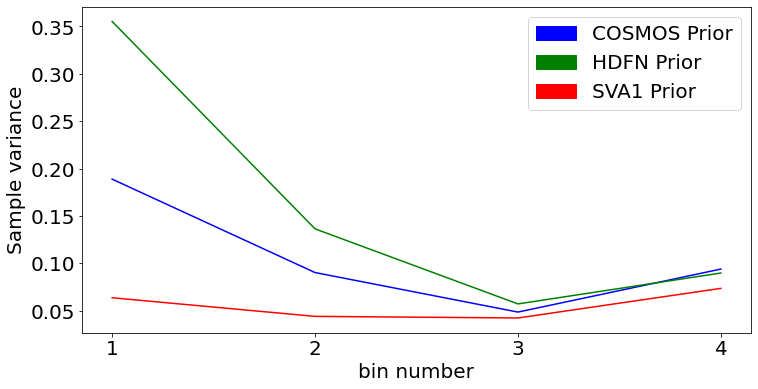

In [26]:
# for i in range(3):
#     plt.xlabel('bin number')
#     plt.ylabel(f'BPZ variance for prior {prior_label(i)}')
#     plt.plot([1, 2, 3, 4] ,variance_bpz[i])
#     plt.show()
import matplotlib

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()
colors=['blue', 'green', 'red']
patches=[]
x = [1, 2, 3, 4]
default_ticks = range(1, 5)
for i in range(3):
    ax.set_xticks(default_ticks, x)
    ax.set_xlabel(xlabel='bin number')
    ax.set_ylabel(ylabel=f'Sample variance')
    plot = ax.plot([1, 2, 3, 4] ,variance_samp[i], color=colors[i], lw=1.5)
    patches.append(mpatches.Patch(color=colors[i], label=prior_label(i)))
    fig.set_size_inches(12, 6)
ax.legend(handles=patches)
fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/Variance.png')
fig.show()

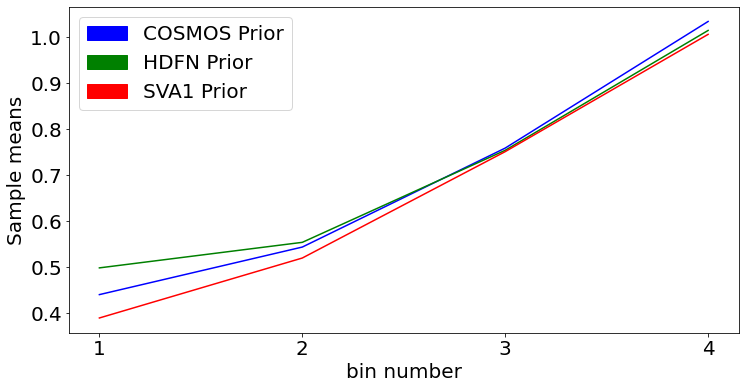

In [27]:

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()
colors=['blue', 'green', 'red']
patches=[]
x = [1, 2, 3, 4]
default_ticks = range(1, 5)
for i in range(3):
    ax.set_xticks(default_ticks, x)
    ax.set_xlabel(xlabel='bin number')
    ax.set_ylabel(ylabel=f'Sample means')
    plot = ax.plot([1, 2, 3, 4] ,means_samp[i], color=colors[i], lw=1.5)
    patches.append(mpatches.Patch(color=colors[i], label=prior_label(i)))
    fig.set_size_inches(12, 6)
ax.legend(handles=patches)
fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/Means.png')
fig.show()

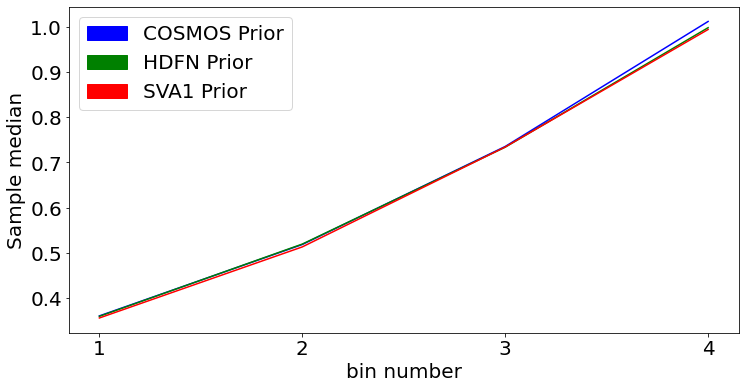

In [28]:

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()
colors=['blue', 'green', 'red']
patches=[]
for i in range(3):
    ax.set_xticks(default_ticks, x)
    ax.set_xlabel(xlabel='bin number')
    ax.set_ylabel(ylabel=f'Sample median')
    plot = ax.plot([1, 2, 3, 4] ,median_samp[i], lw=1.5, color=colors[i])
    patches.append(mpatches.Patch(color=colors[i], label=prior_label(i)))
    fig.set_size_inches(12, 6)
ax.legend(handles=patches)
fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/Medians.png')
fig.show()

In [29]:
def diffindex(i, maximum):
    if i==maximum: return i-2
    else: return i+1

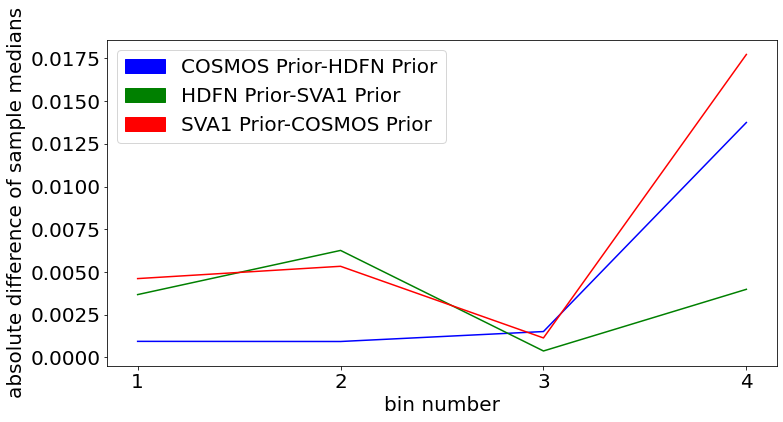

In [30]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()
colors=['blue', 'green', 'red']
patches=[]
for i in range(3):
    #ax.set_yscale('log')
    ax.set_xticks(default_ticks, x)
    ax.set_xlabel(xlabel='bin number')
    ax.set_ylabel(ylabel=f'absolute difference of sample medians')
    plot = ax.plot([1, 2, 3, 4] , np.abs(median_samp[i]-median_samp[diffindex(i, 2)]), lw=1.5, color=colors[i])
    patches.append(mpatches.Patch(color=colors[i], label=prior_label(i)+'-'+prior_label(diffindex(i, 2))))
    fig.set_size_inches(12, 6)
ax.legend(handles=patches)
fig.savefig(f'/home/raulteixeira/scratch-midway2/CosmicShearData/images/Medians.png')
fig.show()

In [31]:
   
# for i in range(3):   
#     plt.xlabel('bin number')
#     plt.ylabel(f'BPZ means for prior {prior_label(i)}')
#     plt.plot([1, 2, 3, 4] ,means_bpz[i])
#     plt.show()

In [32]:
m_and_v = Table()

In [33]:
for i in range(3): 
    m_and_v[f'MEAN_BPZ_{i}'] = means_bpz[i]
    m_and_v[f'MEAN_SAMP_{i}'] = means_samp[i]

In [34]:
m_and_v

MEAN_BPZ_0,MEAN_SAMP_0,MEAN_BPZ_1,MEAN_SAMP_1,MEAN_BPZ_2,MEAN_SAMP_2
float64,float64,float64,float64,float64,float64
1.5e-323,0.4398908819004011,1e-322,0.4979724566780326,1.83e-322,0.3891532233838446
3.5e-323,0.5431876509768724,1.2e-322,0.5534452753015107,2.08e-322,0.5193713494118912
5.4e-323,0.7581649119042709,1.43e-322,0.7533749290976488,2.27e-322,0.7504467333692431
8e-323,1.0332066866824323,1.63e-322,1.013697489433259,2.47e-322,1.0051918177636368


In [35]:
hist1[0].max()

24282.0

In [36]:
start, end = 0, 3

POSTERIOR1 = POSTERIOR2 = POSTERIOR3 = np.zeros_like(zs)

fnamelist = glob.glob('/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/probs/*METACAL*')

tiles = []
for fname in fnamelist:
    tiles.append(fname.split('_')[-1].split('.')[0])

tiles = np.unique(tiles)

for tile in tiles[start:end]:
    # opening probs files
    path = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/probs/pz_cosmos_Laigle_py3_METACAL4_probs_{tile}'
    probs1 = shelve.open(path)

    path = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/probs/pz_METACAL4_probs_{tile}'
    probs2 = shelve.open(path)

    path = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/probs/pz_sva1_weights_METACAL4_probs_{tile}'
    probs3 = shelve.open(path)
    
    #IDs
    iIDs1=list(probs1.keys())[2:]
    iIDs2=list(probs2.keys())[2:]
    iIDs3=list(probs3.keys())[2:]
    length1 = len(iIDs1)
    length2 = len(iIDs2)
    length3 = len(iIDs3)
    
    posteriortotal1 = posteriortotal2 = posteriortotal3 = np.zeros_like(zs)

    for i, ID in enumerate(iIDs1):
        if i%1000==0: print(i, 'out of', length1)
        posterior1 = np.sum(probs1[ID][2]*probs1[ID][1], axis=1)
        norm = np.sum(posterior1)
        #posterior1 /= norm
        posteriortotal1 += posterior1
    
    POSTERIOR1 += posteriortotal1
    
    for i, ID in enumerate(iIDs2):
        if i%1000==0: print(i, 'out of', length2)
        posterior2 = np.sum(probs2[ID][2]*probs2[ID][1], axis=1)
        norm = np.sum(posterior2)
        #posterior2 /= norm
        posteriortotal2 += posterior2
        
    POSTERIOR2 += posteriortotal2
    
    for i, ID in enumerate(iIDs3):
        if i%1000==0: print(i, 'out of', length3)
            
        #print((np.sum(probs3[ID][2]*probs3[ID][1], axis=1)-np.sum(probs2[ID][2]*probs2[ID][1], axis=1)))
        posterior3 = np.sum(probs3[ID][2]*probs3[ID][1], axis=1)
        norm = np.sum(posterior3)
        #posterior3 /= norm
        posteriortotal3 += posterior3
        
    print(np.all(posteriortotal2==posteriortotal3))
    
    POSTERIOR3 += posteriortotal3

True
True


In [37]:
POSTERIOR1==POSTERIOR2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,